# TASK 3 : IRIS FLOWER CLASSIFICATION

## Objective 

The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

## Context About Dataset

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Iris Dataset is considered as the Hello World for data science.

## Importing necessary libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score 
from sklearn.metrics import confusion_matrix

## Importing dataset

In [39]:
data = pd.read_csv('IRIS.csv')

## Data exploration

In [40]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
data.shape

(150, 5)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Check for missing values

In [44]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Check data is balanced or not

In [45]:
data.value_counts('species')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## EDA

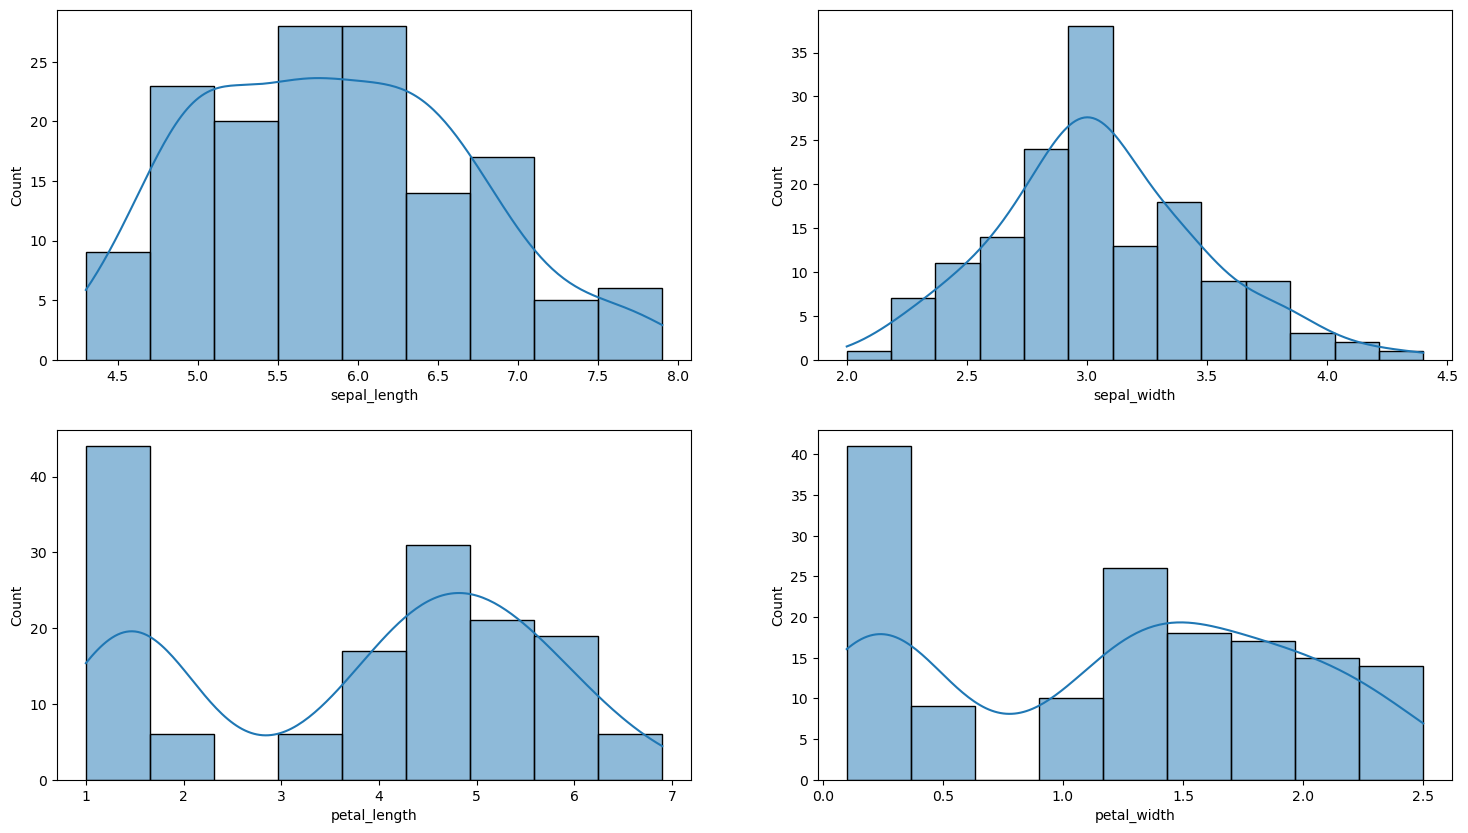

In [46]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.histplot(data['sepal_length'], kde=True)

plt.subplot(2,2,2)
sns.histplot(data['sepal_width'], kde=True)

plt.subplot(2,2,3)
sns.histplot(data['petal_length'], kde=True)

plt.subplot(2,2,4)
sns.histplot(data['petal_width'], kde=True)

plt.show()

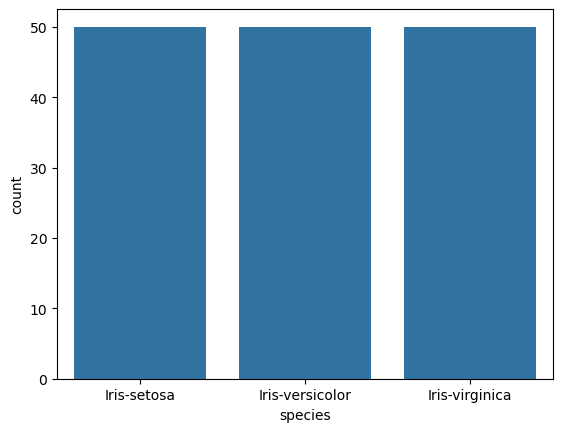

In [48]:
sns.countplot(data = data, x = 'species', dodge='auto')
plt.show()

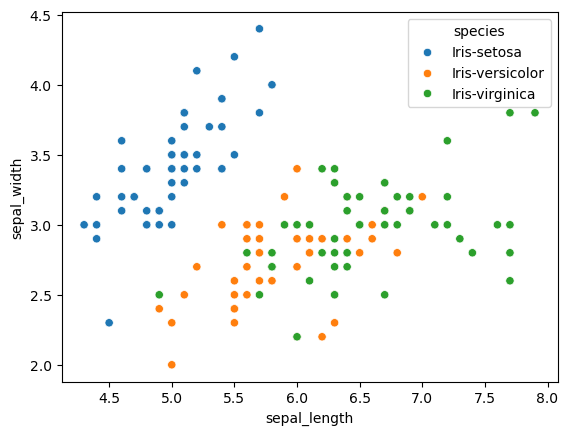

In [49]:
# Relationship between 'sepal_length' and 'sepal_width'
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)
plt.show()

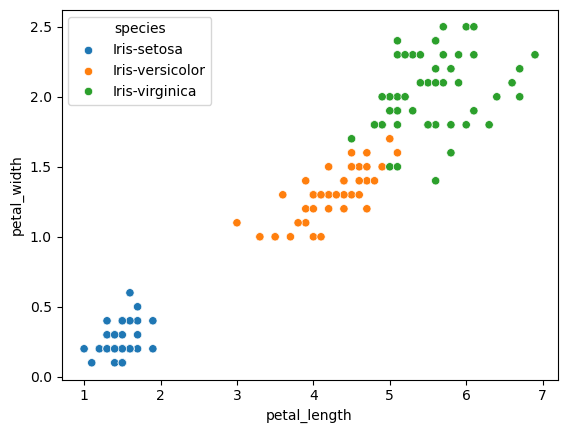

In [50]:
# Relationship between 'petal_length' and 'petal_width'
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=data)
plt.show()

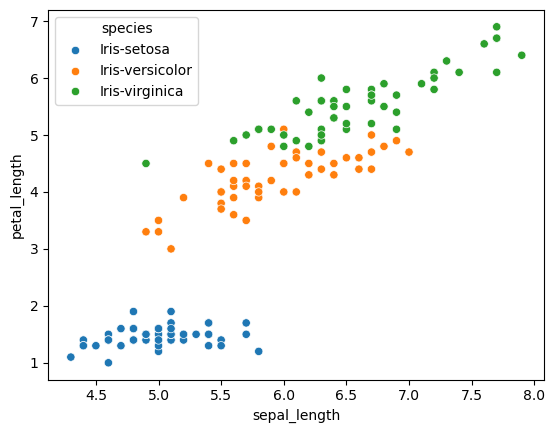

In [51]:
# Relationship between 'sepal_length' and 'petal_length'
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=data)
plt.show()

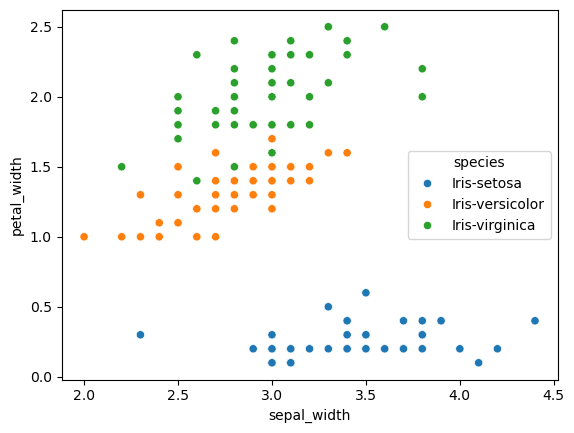

In [52]:
# Relationship between 'sepal_width' and 'petal_width'
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=data)
plt.show()

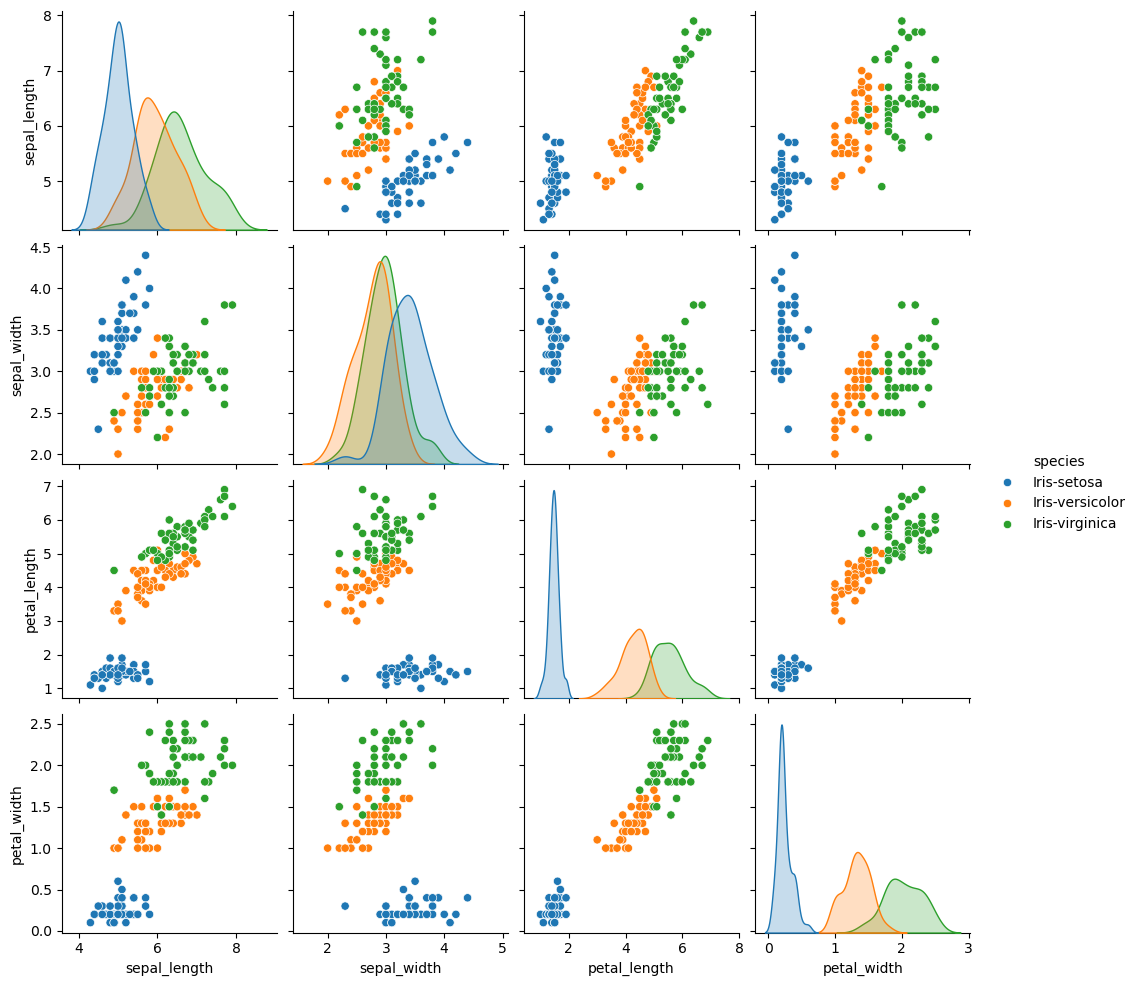

In [53]:
sns.pairplot(data, hue="species")
plt.show()

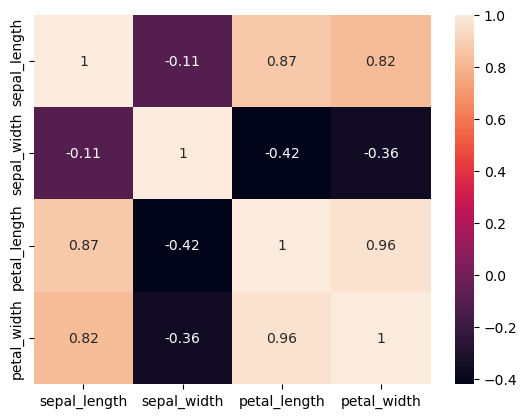

In [54]:
sns.heatmap(data.select_dtypes(include=['number']).corr(method='pearson'), annot = True)
plt.show()

## Feature Engineering & Data Pre-processing

In [55]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
encoded_species = data['species'].unique()
print("Encoded species: ", encoded_species)

Encoded species:  [0 1 2]


In [56]:
X = data.drop('species', axis=1)
y = data['species']

In [57]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (150, 4)
Shape of y:  (150,)


In [58]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

## Data Splitting

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Support Vector Machine

In [81]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
# Perform 10-fold cross-validation on the training set
scores_svm = cross_val_score(svm_classifier, X_train, y_train, cv=5)
mean_svm_score = np.mean(scores_svm) * 100
print(f"Mean cross-validation score: {mean_svm_score:.2f}%")
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

Mean cross-validation score: 94.17%
SVM Accuracy: 100.00%


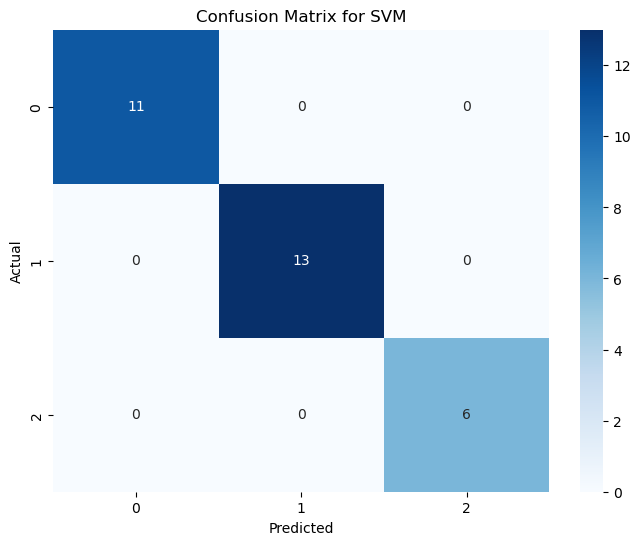

In [85]:
# Confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()


##  K-Nearest Neighbors (k-NN)

In [76]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
# Train the model on the entire training set
knn_classifier.fit(X_train, y_train)
# Perform 10-fold cross-validation on the training set
scores_knn = cross_val_score(knn_classifier, X_train, y_train, cv=5)
mean_knn_score = np.mean(scores_knn) * 100
print(f"Mean cross-validation score: {mean_knn_score:.2f}%")
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

Mean cross-validation score: 92.50%
KNN Accuracy: 96.67%


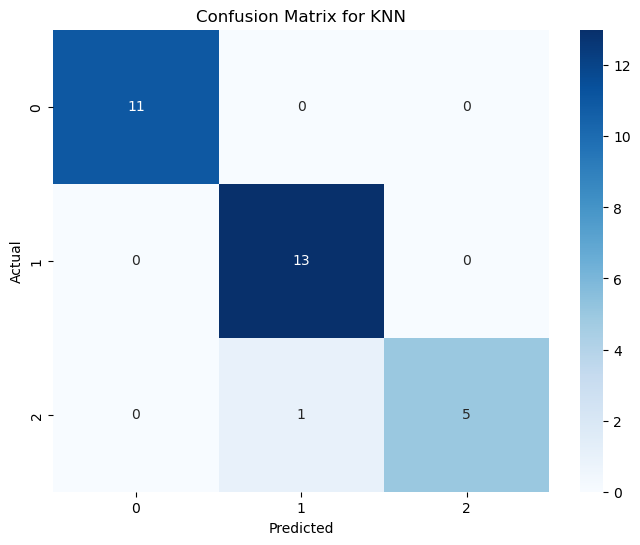

In [86]:
# Confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()


## Decision Tree

In [88]:
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the model on the entire training set
dt_classifier.fit(X_train, y_train)
# Perform 10-fold cross-validation on the training set
scores_dt = cross_val_score(dt_classifier, X_train, y_train, cv=5)
mean_dt_score = np.mean(scores_dt) * 100
print(f"Mean cross-validation score: {mean_dt_score:.2f}%")
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

Mean cross-validation score: 92.50%
Decision Tree Accuracy: 100.00%


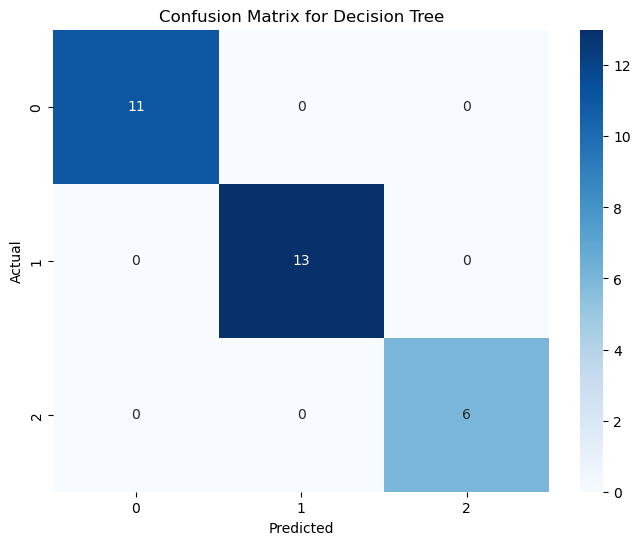

In [89]:
# Confusion matrix
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()
